# Signal Processing report

### Question 1:
The magnitude of $f_{1}$ :

Text(0,0.5,'amplitude')

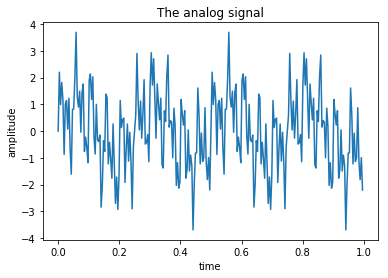

In [197]:
import numpy as np
import scipy.signal as sp
import numpy.fft as fft
import matplotlib.pyplot as plt
import pywt as wv

#number of sample points
N=256

#sample spacing
T=np.linspace(0,1,N,endpoint=False)

#the signal
f=np.sin(2*np.pi*4*T)+np.sin(2*np.pi*20*T)+np.sin(2*np.pi*40*T)+np.sin(2*np.pi*90*T)
plt.plot(T,f)

#labels and title
plt.title("The analog signal")
plt.xlabel("time")
plt.ylabel("amplitude")




the raw signal is composed bu law and high frequancies  

In [198]:
#f111=np.sin(2*np.pi*4*T)
#plt.plot(T,f111)
#I just did this to show that the sinusoid has magnistude 1, but I am not sure if this is necessary.

Text(0.5,0,'time')

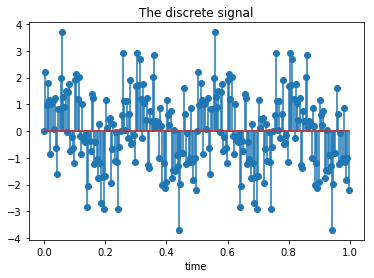

In [199]:
plt.figure()
plt.stem(T,f)
plt.title("The discrete signal")
plt.xlabel("time")



Text(0,0.5,'Magnitude')

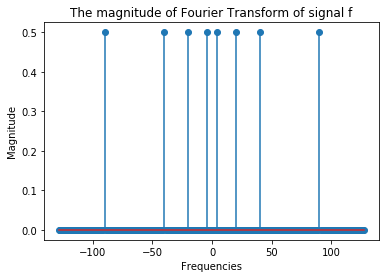

In [200]:
plt.figure()
F=fft.fft(f)/N
plt.stem((np.arange(N)-N/2),fft.fftshift(abs(F)))
plt.title("The magnitude of Fourier Transform of signal f")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")


#### 1.2  
The Fourier transform of the sinusoidal signal plotted the magnitude of $f_{1}$. the magnitude's plot of the signal is a function of frequency, the peakes are correspond to the signal's frequency components of 4,20,40,96. The transform also produces a mirror copy of the peakes, which correspond to the signal's negative frequencies. To better visualize its periodicity, we can use the $fftshift$ function which performs a zero-centered plot of the transform.
We choose $endpoint=false$ to not obtain the noise possible to occur.

#### Question 2

Text(0,0.5,'Magnitude')

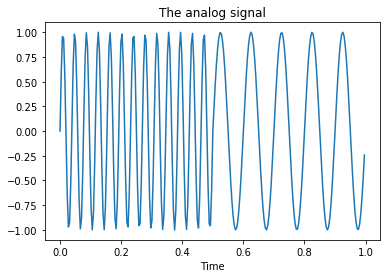

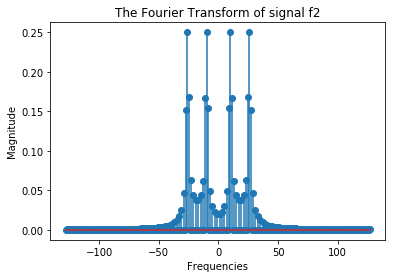

In [201]:
T1=np.linspace(0,1./2,int(N/2),endpoint=False)
T2=np.linspace(1./2,1,int(N/2),endpoint=False)

f2=np.append(np.sin(2*np.pi*26*T1),np.sin(2*np.pi*10*T2))
plt.plot(T,f2)
plt.title("The analog signal")
plt.xlabel("Time")
plt.figure()
F2=fft.fft((f2))/N
plt.stem(np.arange(N)-N/2,fft.fftshift(abs(F2)))
plt.title("The Fourier Transform of signal f2")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")

#### 2-2
We can see clearly from the graph that the signal is made from two sinusoides with frequencies 10 and 26 because for this frequencies we have two peaks at these points. But, since we changed from one frequency to another than  we will have some noise around these peaks. By other words, there are some Fourier coefficients around this two frequencies.

#### 2-3
The answer is NO.We can't see it, because wanted to see that then we should know the time which this two signals are concatinated.But this isn't possible since the FFT does not give any information about time.

#### 2-4

In [202]:
f,b, SF2=sp.stft(f2,fs=N,nperseg=int(N/2.0))

#2.5 
print(b)
print(f)
#print(SF2)

[0.   0.25 0.5  0.75 1.  ]
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128.]


The STFT takes as argument the signal, the sampling frequency of that signal, length of which window, and some other arguments like window type, return onesided which will positive spectrum(freuquencies) if set to true and two sided if it is set to false, and some other arguments which can be changed based on our needs.
And the STFT returns 3 arguments which are f,b,and SF2.

f = array of the sampled frequencies which in our case is of dimension 64

b = Array of segment times, in our case has length 5 (the center of each time's segment)

SF2 = the Short Time Fourier Transform for the given window




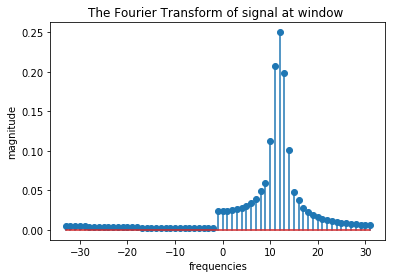

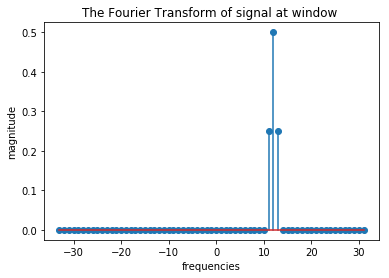

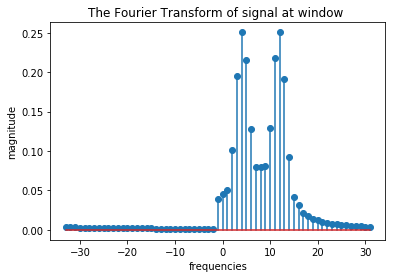

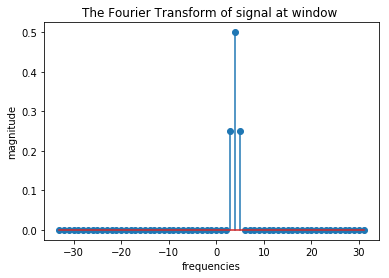

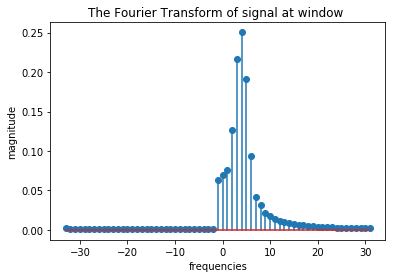

<Figure size 432x288 with 0 Axes>

In [203]:
#2.6
for i in range(5):
    plt.stem((np.arange(65)-33),fft.fftshift(abs(SF2[:,i])))
    plt.title("The Fourier Transform of signal at window ") 
    plt.xlabel("frequencies")
    plt.ylabel("magnitude")
    plt.figure()

    

##### the plot shows us the short fourier transform at each window, as we notice the second and the third window we notice that the signal is absolut sinusoid . (I think here should comment more about each window).
The first plot corresponds to the first position of the window, so we observe the first sinusoid and some zeros around it means the the signal's position is just in the second part of the window, the first part was given zero values
In the second window we have only the second sinusoid. It can be seen that we have not mix with zeros, and that is why the intensity is greater.
In the third window we have both the first and the second sinusoid, because we are just in the middle.
In the fourth window we have the last sinusoid.
In the fifth window we have the second sinusoid plus some zeros (same case as the first window).

#### 2.7

Text(0,0.5,'Frequency')

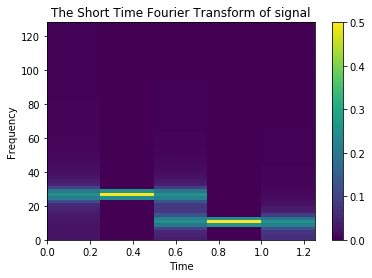

In [204]:
psf2=plt.pcolormesh(np.append(b,1.25),f, abs(SF2))
plt.colorbar(psf2) #Here I added this colorbar, so that it makes easier the interpretation of pcolormesh bcs its weird 
#(these kinds of comments must be removed)
plt.title("The Short Time Fourier Transform of signal") 
plt.xlabel("Time")
plt.ylabel("Frequency")

#### 2.8
The pcolormesh is better, for many reasons because we can see what frequency does the signal has for a given time. And in our example the problem was that we couldn't see when exactly does the concantination happened. 
By viewing the colormesh we can see clearly that for time from 0 to 1\2 we have frequency 26, and then from 1\2 to 1 we have frequency 10.
So STFT has some advantages compared to the usual FFT but still there are some problems, which we will disccus on the next question.


#### 2.9

<StemContainer object of 3 artists>

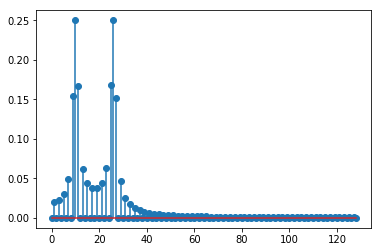

In [205]:
#2.9
N=256
ff,b, SF33=sp.stft(f2,fs=N,nperseg=int(N),boundary=None,window=sp.boxcar(N))
plt.figure()
plt.stem(ff,np.abs(SF33))



#### 3
What happens if we create a singularity on the given signal before applying the STFT.

<StemContainer object of 3 artists>

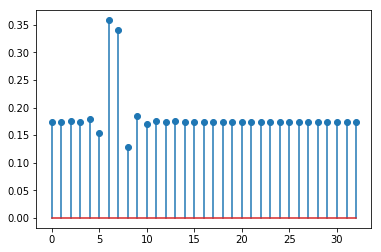

In [206]:
f3=f2
f3[65]=5
f2=np.append(f2,f3)
#f,b,SF3= sp.stft((f3),fs=24,nperseg=int(64),axis=-1)
#plt.stem(np.arange(N)-N/2,fft.fftshift(abs(SF3)))
f,b,SF3= sp.stft(f3,fs=128,nperseg=int(64),axis=-1)
#plt.stem(abs(SF3))
plt.stem(abs(SF3)[0:int(64),2])



Now we can see that the singularities are a problem for the STFT. Why?

We know from the heisenberg principle that we always a drawback between time and frequency,if we use large window then we have good resoution of frequency but bad resolution about time,and vice-versa if we use small window we get good resolution about time and poor resolution about frequency. By adding to this the fixed length of the window than we conclude that we can never get the exact time when a frequency occurs but just interval of times. So when you have a singularity, obviously this happens at certain time but the STFT can't give us the information and this makes it hard to identify the time when the signal is regular and the time when the signal is singular.

We mentioned above that singularities are a problem for the STFT, so let us test it with an another transformation which is known also as the wavelet transform,
When we plot it as we see, we have something like a colormesh but the good thing is that we have at the same graph ploted the frequency and the time so now we can see what happens at the singular point.The vertical axis is the freauency.

#### 3.2

/home/abdelhak/anaconda3/lib/python3.7/site-packages/pywt/_cwt.py:74: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


<Figure size 432x288 with 0 Axes>

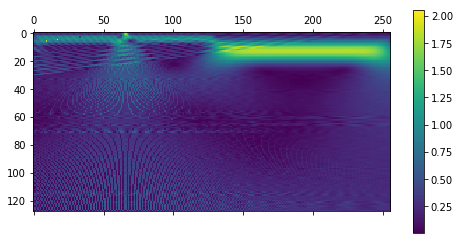

In [207]:
Wf3, freqs = wv.cwt(f3, np.arange(1,129),'cmor')
plt.figure()
pwf3=plt.matshow(abs(Wf3))
plt.colorbar(pwf3)



The vertical axis represent the frequency and the plot provide us with an important information or locaalization when exactly the concatenation happened.

#### 3.3:
The contunious Wavelets (Morlet) Transformation:

ContinuousWavelet cmor
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


/home/abdelhak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  


Text(0,0.5,'Values')

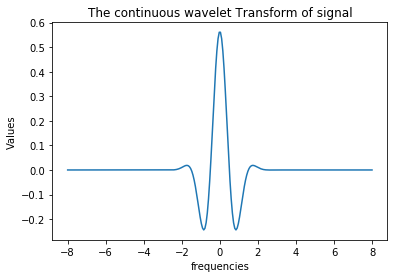

In [208]:
N=256
cmorlet=wv.ContinuousWavelet('cmor')
print(cmorlet)
psimor,t=cmorlet.wavefun(level=1,length=N)
plt.figure()
plt.plot(t,psimor.real)
plt.title("The continuous wavelet Transform of signal") 
plt.xlabel("frequencies")
plt.ylabel("Values")

#### Representation of absolute value of Fourier Transform of cmorlet 

Text(0,0.5,'Magnitude')

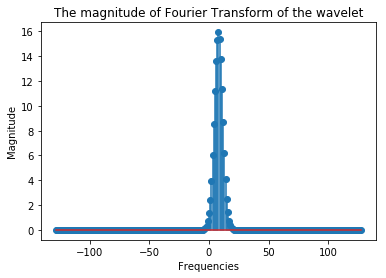

In [209]:
C=fft.fft(psimor)
plt.stem((np.arange(N)-N/2),fft.fftshift(abs(C)))
plt.title("The magnitude of Fourier Transform of the wavelet")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")

When we apply the fft on the complex Morlet wavelet, we observe that the its spectrum has gotten only positive values, so what we get is a peak near zero,this is because it is complex wavelet and when we are taking the modulus all what we are going to get is some concetration of the energy around one because, one is a vanishing moment for the complex wavelet.
 

Text(0,0.5,'Magnitude')

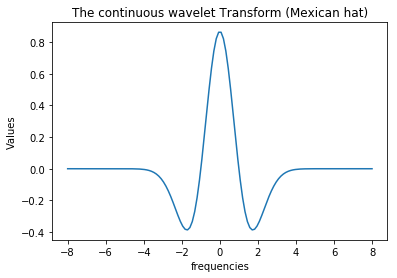

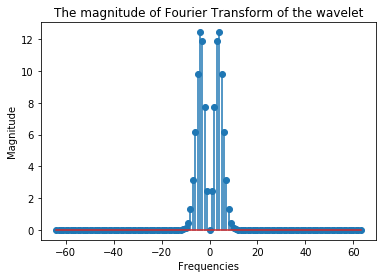

In [210]:
N=128
cmex=wv.ContinuousWavelet('mexh')
psimor_mex,t=cmex.wavefun(level=1,length=N)
plt.figure()
plt.plot(t,psimor_mex.real)
plt.title("The continuous wavelet Transform (Mexican hat)") 
plt.xlabel("frequencies")
plt.ylabel("Values")
plt.figure()
M=fft.fft(psimor_mex)
plt.stem((np.arange(N)-N/2),fft.fftshift(abs(M)))
plt.title("The magnitude of Fourier Transform of the wavelet")
plt.xlabel("Frequencies")
plt.ylabel("Magnitude")

### observetion
On the other hand the Mexican hat has different spectrum since it is not complex,when we apply the fft we will get to simetric peaks with the energy concentrated around 2 and -2 and this i because the Mexican Hat can be optained as the second derivative of the gaussian. Now since every p order derivative of Gaussian has the p-th vanishing moment, for the Mexican hat consider p=2 so we will get a concetration of the energy spectrum around 2 and -2.

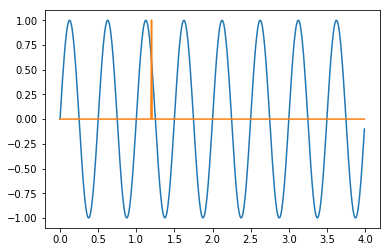

In [211]:
n=np.linspace(0,4,500,endpoint=False)

S=np.sin(2*np.pi*2*n)
plt.plot(n,S)

def dirac(t,a):
    delta=np.zeros(len(t))
    for i in range(len(t)):
        if (i==a):
            delta[i]=1
            
    return delta      

plt.plot(n,dirac(n,150))




ContinuousWavelet cmor
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


/home/abdelhak/anaconda3/lib/python3.7/site-packages/pywt/_cwt.py:74: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/home/abdelhak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  


Text(0.5,1.05,'the continuous wavelet transfom of pure sinusoide by complex Morlet Transform')

<Figure size 432x288 with 0 Axes>

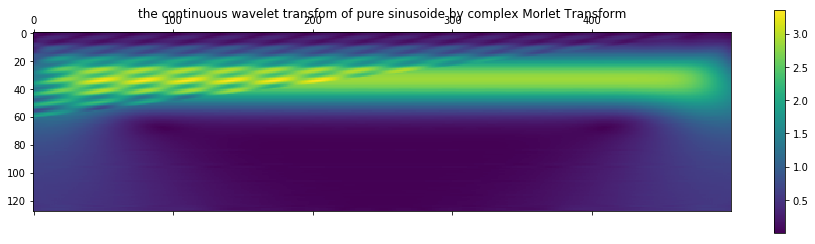

In [216]:
W, frqs = wv.cwt(S, np.arange(1,129),'cmor')
plt.figure()
pwS=plt.matshow(abs(W))
plt.colorbar(pwS)
N=256
cmorletS=wv.ContinuousWavelet('cmor')
print(cmorletS)
psimorS,t=cmorletS.wavefun(level=1,length=N)
plt.title("the continuous wavelet transfom of pure sinusoide by complex Morlet Transform")




ContinuousWavelet mexh
  Family name:    Mexican hat wavelet
  Short name:     mexh
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


Text(0.5,1.05,'the continuous wavelet transfom of pure sinusoide by Mexican Hat Transform')

<Figure size 432x288 with 0 Axes>

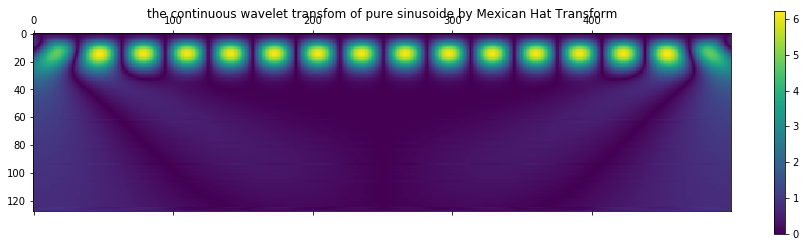

In [218]:
Wm, frqs = wv.cwt(S, np.arange(1,129),'mexh')
plt.figure()
pwSm=plt.matshow(abs(Wm))
plt.colorbar(pwSm)
N=256
cmorletSm=wv.ContinuousWavelet('mexh')
print(cmorletSm)
psimorSm,t=cmorletSm.wavefun(level=1,length=N)

plt.title("the continuous wavelet transfom of pure sinusoide by Mexican Hat Transform")


ContinuousWavelet cmor
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


/home/abdelhak/anaconda3/lib/python3.7/site-packages/pywt/_cwt.py:74: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/home/abdelhak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  


Text(0.5,1.05,'the continuous wavelet transfom of impulsion by complex Morlet transform')

<Figure size 432x288 with 0 Axes>

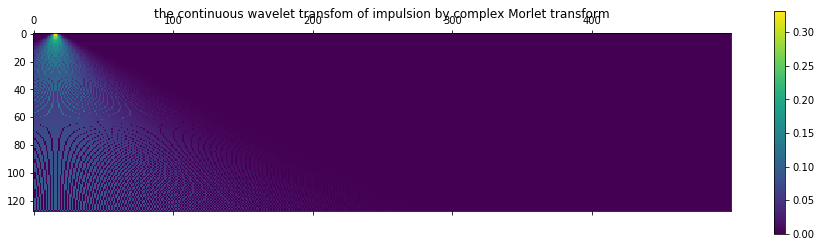

In [220]:
w, frqs = wv.cwt(dirac(n,15), np.arange(1,129),'cmor')
plt.figure()
pwD=plt.matshow(abs(w))
plt.colorbar(pwD)
N=256
cmorletD=wv.ContinuousWavelet('cmor')
print(cmorletD)
psimorD,t=cmorletD.wavefun(level=1,length=N)
plt.title("the continuous wavelet transfom of impulsion by complex Morlet transform")



ContinuousWavelet cmor
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


Text(0.5,1.05,'the continuous wavelet transfom of impulsion by Mexican Hat Transform')

<Figure size 432x288 with 0 Axes>

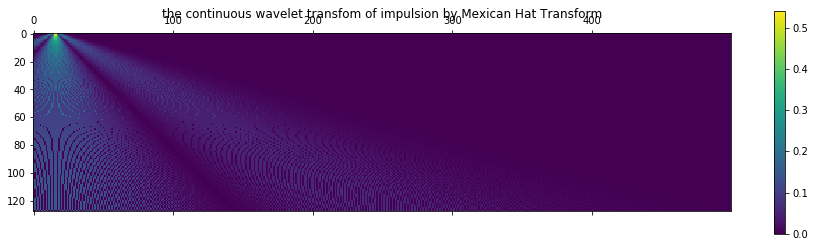

In [219]:
wm, frqs = wv.cwt(dirac(n,15), np.arange(1,129),'mexh')
plt.figure()
pwDm=plt.matshow(abs(wm))
plt.colorbar(pwDm)
N=256
cmorletDm=wv.ContinuousWavelet('mexh')
print(cmorletD)
psimorDm,t=cmorletDm.wavefun(level=1,length=N)
plt.title("the continuous wavelet transfom of impulsion by Mexican Hat Transform")